## Convolution Neural Network Using the CIFAR10 Dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

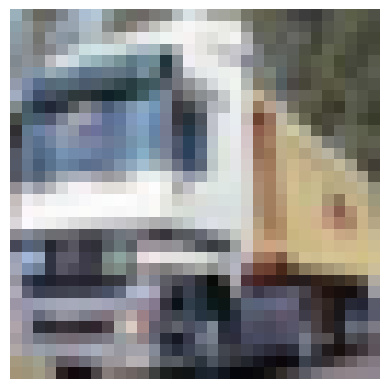

In [6]:
plt.imshow(x_train[1])
plt.axis('off');

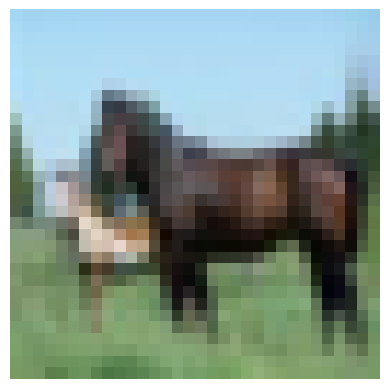

In [7]:
plt.imshow(x_train[12])
plt.axis('off');

### Pre Processing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Normalizing

In [9]:
x_train = x_train/255
x_test = x_test/255

## Labels

In [11]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

## Building a Model 

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [13]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# MAX POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# MAXPOOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN LAYER
model.add(Flatten())

# DENSE LAYER
model.add(Dense(256, activation='relu'))

# FINAL LAYER
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model Summary 

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

## Training the model

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy',patience=3,mode='max')

In [16]:
model.fit(x_train,y_cat_train,epochs=30,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/30
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5265 - accuracy: 0.4522 - val_loss: 1.3628 - val_accuracy: 0.5089
Epoch 2/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1654 - accuracy: 0.5937 - val_loss: 1.1889 - val_accuracy: 0.5942
Epoch 3/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0154 - accuracy: 0.6480 - val_loss: 1.0863 - val_accuracy: 0.6285
Epoch 4/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9108 - accuracy: 0.6851 - val_loss: 1.0413 - val_accuracy: 0.6507
Epoch 5/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8283 - accuracy: 0.7135 - val_loss: 1.1757 - val_accuracy: 0.6161
Epoch 6/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7663 - accuracy: 0.7381 - val_loss: 1.0411 - val_accuracy: 0.6511
Epoch 7/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7111 - accuracy: 0.7578 - val_loss: 1.1927 - val_ac

Saving the data as a dataframe

In [17]:
new_metrics = pd.DataFrame(model.history.history)

In [18]:
new_metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.526471,0.45220,1.362833,0.5089
1,1.165401,0.59370,1.188883,0.5942
2,1.015441,0.64800,1.086311,0.6285
3,0.910804,0.68512,1.041298,0.6507
4,0.828322,0.71352,1.175692,0.6161


## Visualization

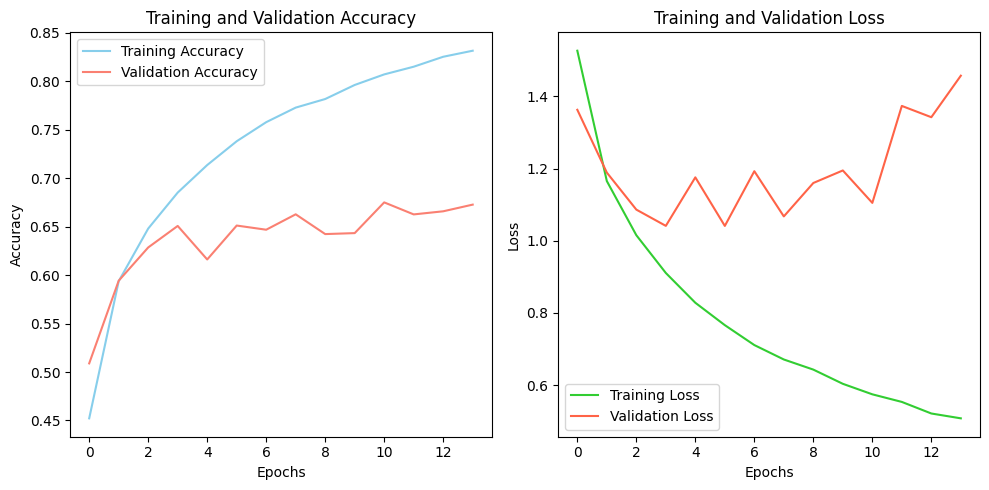

In [20]:
# Plotting accuracy and validation accuracy with new colors
plt.figure(figsize=(10, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(new_metrics['accuracy'], label='Training Accuracy', color='skyblue')
plt.plot(new_metrics['val_accuracy'], label='Validation Accuracy', color='salmon')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss and validation loss with new colors
plt.subplot(1, 2, 2)
plt.plot(new_metrics['loss'], label='Training Loss', color='limegreen')
plt.plot(new_metrics['val_loss'], label='Validation Loss', color='tomato')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

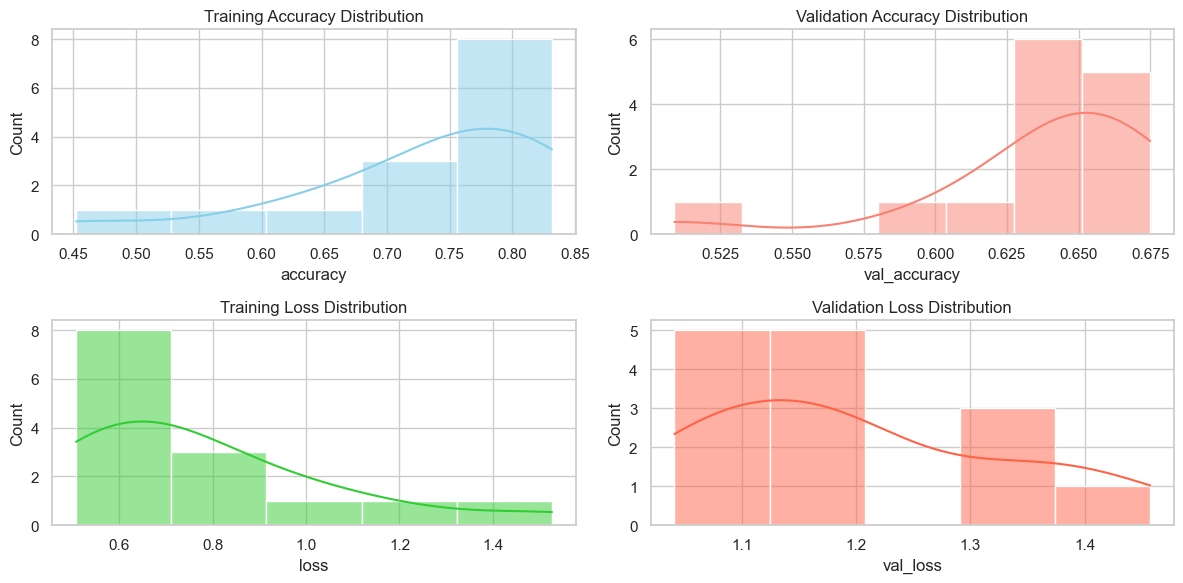

In [21]:
# Set the style
sns.set(style="whitegrid")

# Create subplots for each metric with new colors
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(new_metrics['accuracy'], color='skyblue', kde=True)
plt.title('Training Accuracy Distribution')

plt.subplot(2, 2, 2)
sns.histplot(new_metrics['val_accuracy'], color='salmon', kde=True)
plt.title('Validation Accuracy Distribution')

plt.subplot(2, 2, 3)
sns.histplot(new_metrics['loss'], color='limegreen', kde=True)
plt.title('Training Loss Distribution')

plt.subplot(2, 2, 4)
sns.histplot(new_metrics['val_loss'], color='tomato', kde=True)
plt.title('Validation Loss Distribution')

plt.tight_layout()
plt.show()

<Axes: >

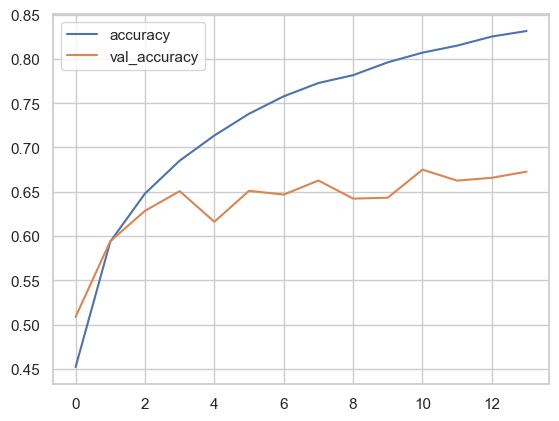

In [22]:
new_metrics[['accuracy','val_accuracy']].plot()

<Axes: >

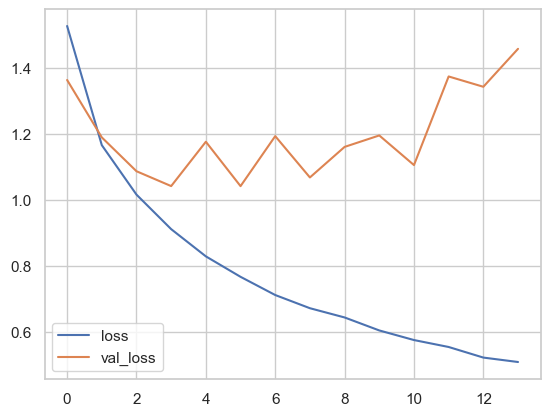

In [23]:
new_metrics[['loss','val_loss']].plot()

## Evaluation

In [24]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.4573020935058594, 0.6726999878883362]


## Prediction 

In [25]:
my_image = x_test[16]

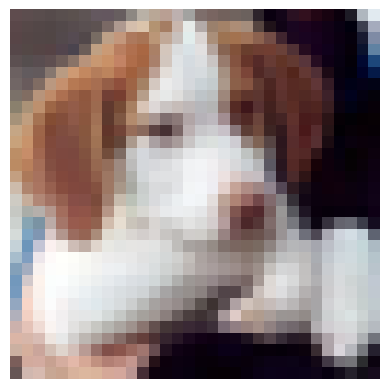

In [26]:
plt.imshow(my_image)
plt.axis('off');

In [27]:
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 73ms/step


array([[7.8790940e-10, 2.6607392e-09, 1.5307016e-06, 5.8785168e-04,
        7.4918972e-15, 9.9941027e-01, 5.4733051e-10, 2.6933489e-07,
        8.2533774e-10, 7.1060214e-08]], dtype=float32)